In [17]:
using PyCall
np = pyimport("numpy")
import DifferentialEquations: DP8
#using DifferentialEquations
#using DynamicalSystems
#using PyPlot
#using DiffEqCallbacks
#using ForwardDiff
using Latexify, LaTeXStrings, SymEngine
using LinearAlgebra

In [26]:
include("..\\Utils\\Computation_Utils.jl")
#include("Utils\\CallBack_Utils.jl")
#include("Utils\\YAML_Utils.jl")
#include("ODEs\\BS_Uni_System.jl")
include("..\\Utils\\PeriodSync_Utils.jl")
include("..\\ODEs\\SL_System.jl")

Main.SL_Sys

In [4]:
pushfirst!(PyVector(pyimport("sys")."path"), "..\\")
MU = pyimport("Utils.Matplotlib_Utils")

PyObject <module 'Utils.Matplotlib_Utils' from 'c:\\Users\\artyo\\YandexDisk\\Other\\Julia\\BS_module\\Tests\\..\\Utils\\Matplotlib_Utils.py'>

In [5]:
r = 1.0
omega = 1.0
s = 1/4

#config = [r, omega, s]

config = Dict("omega" => omega, "r" => r, "s" => s)
ODESystem = SL_Sys.Get_SL_Sys(config)
TanSys = SL_Sys.Get_SL_Tan(config)

IC = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [44]:
time_span = 2*pi
trans_time = 0.0

alg = DP8()

dt = 1e-1
abstol = 1e-13
reltol = 1e-13
maxiters = 1e10

ODEKwargs = Dict{Symbol, Any}(:abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10, :dt => 1e-3)
TANKwargs = copy(ODEKwargs); TANKwargs[:save_everystep] = false
diffeq = Dict(:alg => alg, :abstol => abstol, :reltol => reltol, :maxiters => maxiters, :dt => dt)

Dict{Symbol, Any} with 5 entries:
  :maxiters => 1.0e10
  :alg      => DP8()
  :reltol   => 1.0e-13
  :abstol   => 1.0e-13
  :dt       => 0.1

# Наблюдаем периодическую траекторию в системе

In [8]:
sol = Computation_Utils.SolveODE(ODESystem, IC, time_span; alg = alg,
                                                     trans_time = trans_time,
                                                     kwargs = ODEKwargs);

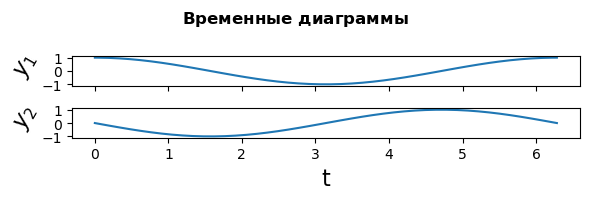

In [9]:
MU.plotTimeSeries(sol)

# Определяем время периода

In [10]:
periodTime = PeriodSync_Utils.getPeriodTime(sol)

6.283185307179586

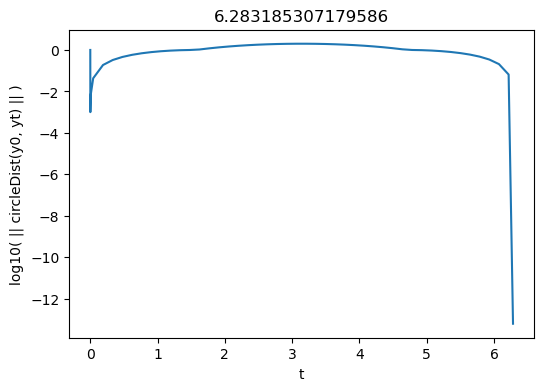

In [11]:
PeriodSync_Utils.plotNorms(sol)

# Интегрируем систему совместно с системой в вариациях

In [12]:
#u0 = [p[1] for p in sol.y]
u0 = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [13]:
Q0 = [1.0, 0.0, 0.0, 1.0]

4-element Vector{Float64}:
 1.0
 0.0
 0.0
 1.0

In [45]:
tan_sol = Computation_Utils.SolveTanODE(ODESystem, TanSys, u0, Q0, periodTime; alg = alg, kwargs = TANKwargs)

Main.Computation_Utils.py_sol([0.0, 6.283185307179586], [[1.0, 1.0000000000000528], [0.0, 6.494845743384258e-14], [1.0, 0.04321391826376785], [0.0, -1.8897653253386638e-14], [0.0, -6.50280609208577e-14], [1.0, 1.0000000000000522]], [Float64[]], Matrix{Float64}[])

In [50]:
x = [x[end] for x in tan_sol.y[1 : 2]]
W = reshape([w[end] for w in tan_sol.y[3 : 6]], (2, 2))

2×2 Matrix{Float64}:
  0.0432139    -6.50281e-14
 -1.88977e-14   1.0

In [51]:
W

2×2 Matrix{Float64}:
  0.0432139    -6.50281e-14
 -1.88977e-14   1.0

In [19]:
exp(-4 * pi * s)

0.04321391826377226

In [52]:
eigen(W)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 0.04321391826376786
 1.0000000000000522
vectors:
2×2 Matrix{Float64}:
 -1.0           6.79651e-14
 -1.97512e-14  -1.0

---